In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
df = pd.read_csv('dataset_AirQual.csv')

#use fillna() method to replace missing values with mean value
df['pm2.5'].fillna(df['pm2.5'].mean(), inplace = True)

#one hot encoding
cols = df.columns.tolist()
df_new = pd.get_dummies(df[cols])

#put column pm2.5 at the end of the df
#avoid one of the column rearrangement steps
cols = df_new.columns.tolist()
cols_new = cols[:5] + cols[6:] + cols[5:6]
df_new = df_new[cols_new]
df_new.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,2010,1,1,0,-21,-11.0,1021.0,1.79,0,0,0,1,0,0,98.613215
1,2,2010,1,1,1,-21,-12.0,1020.0,4.92,0,0,0,1,0,0,98.613215
2,3,2010,1,1,2,-21,-11.0,1019.0,6.71,0,0,0,1,0,0,98.613215
3,4,2010,1,1,3,-21,-14.0,1019.0,9.84,0,0,0,1,0,0,98.613215
4,5,2010,1,1,4,-20,-12.0,1018.0,12.97,0,0,0,1,0,0,98.613215


In [57]:
#get all rows for February 2014
df_14_02 = df_new.loc[(df_new['year'] == 2014) & (df_new['month'] == 2)]

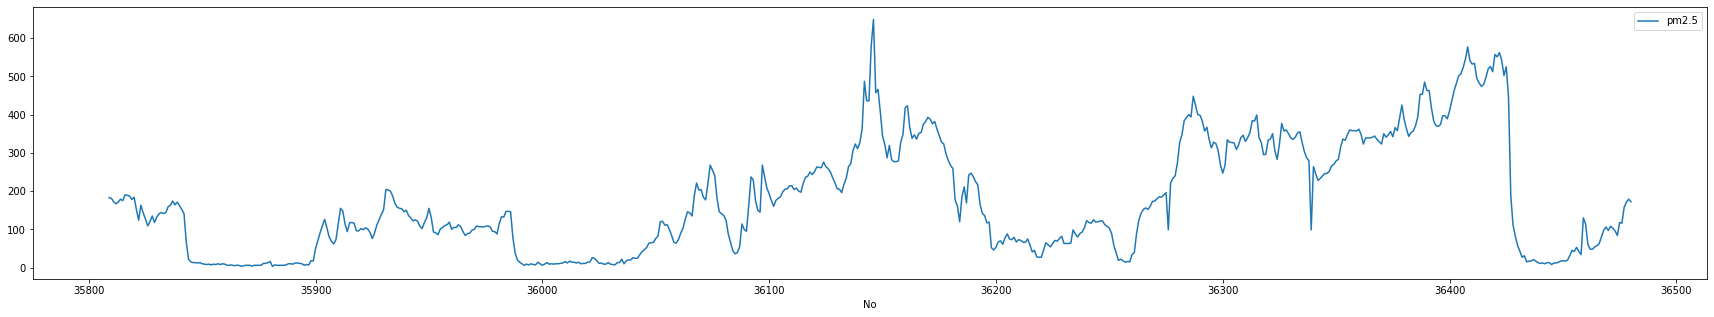

In [58]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30, 5)
df_14_02.plot(kind='line', x='No', y='pm2.5')
plt.show()

In [59]:
#split df in training and test set
#get first and last indexes from df_14_02
print(df_14_02.index[0])
print(df_14_02.index[-1])

35808
36479


In [60]:
df_train = df_new.drop(df_new.index[35808:36480])

In [61]:
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values
X_test = df_14_02.iloc[:, :-1].values
y_test = df_14_02.iloc[:, -1].values

In [62]:
#inintialize ANN as sequence of layers
ann = tf.keras.models.Sequential()
#add input and first hidden layer
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
#add second hidden layer
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
#add third hidden layer
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
#add fourth hidden layer
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
#add output layer
ann.add(tf.keras.layers.Dense(units=1))
#compile the ANN
ann.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#standardize values of training set and train the models
sc = StandardScaler()
X_train_trans = sc.fit_transform(X_train)
regressor_RanFor = RandomForestRegressor(n_estimators = 10, random_state=1)
regressor_DecTree = DecisionTreeRegressor(random_state=1)
 
regressor_RanFor.fit(X_train_trans, y_train)
regressor_DecTree.fit(X_train_trans, y_train)
ann.fit(X_train_trans, y_train, batch_size=32, epochs=100)

Epoch 1/100
1349/1349 [==============================] - 2s 1ms/step - loss: 11280.8682
Epoch 2/100
1349/1349 [==============================] - 2s 1ms/step - loss: 5791.2321
Epoch 3/100
1349/1349 [==============================] - 2s 1ms/step - loss: 5302.9534
Epoch 4/100
1349/1349 [==============================] - 2s 1ms/step - loss: 5099.9306
Epoch 5/100
1349/1349 [==============================] - 2s 1ms/step - loss: 4979.0236
Epoch 6/100
1349/1349 [==============================] - 2s 1ms/step - loss: 4933.8210
Epoch 7/100
1349/1349 [==============================] - 2s 1ms/step - loss: 4538.5279
Epoch 8/100
1349/1349 [==============================] - 1s 1ms/step - loss: 4332.8632
Epoch 9/100
1349/1349 [==============================] - 1s 1ms/step - loss: 4329.0303
Epoch 10/100
1349/1349 [==============================] - 2s 1ms/step - loss: 4117.3488
Epoch 11/100
1349/1349 [==============================] - 1s 1ms/step - loss: 4049.7840
Epoch 12/100
1349/1349 [================

In [64]:
#standardize values of the testing set and predict values
#sc = StandardScaler()
X_test_trans = sc.transform(X_test)
y_pred_RanFor = regressor_RanFor.predict(X_test_trans)
y_pred_DecTree = regressor_DecTree.predict(X_test_trans)
y_pred_ann = ann.predict(X_test_trans)

In [65]:
#transform array to list
y_pred_RanFor = y_pred_RanFor.tolist()
y_pred_DecTree = y_pred_DecTree.tolist()
y_pred_ann = y_pred_ann.tolist()
y_pred_ann_clean = [x[0] for x in y_pred_ann]

In [66]:
#append y_pred to df_14_02
df_14_02['y_pred_RanFor'] = y_pred_RanFor
df_14_02['y_pred_DecTree'] = y_pred_DecTree
df_14_02['y_pred_ann'] = y_pred_ann_clean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

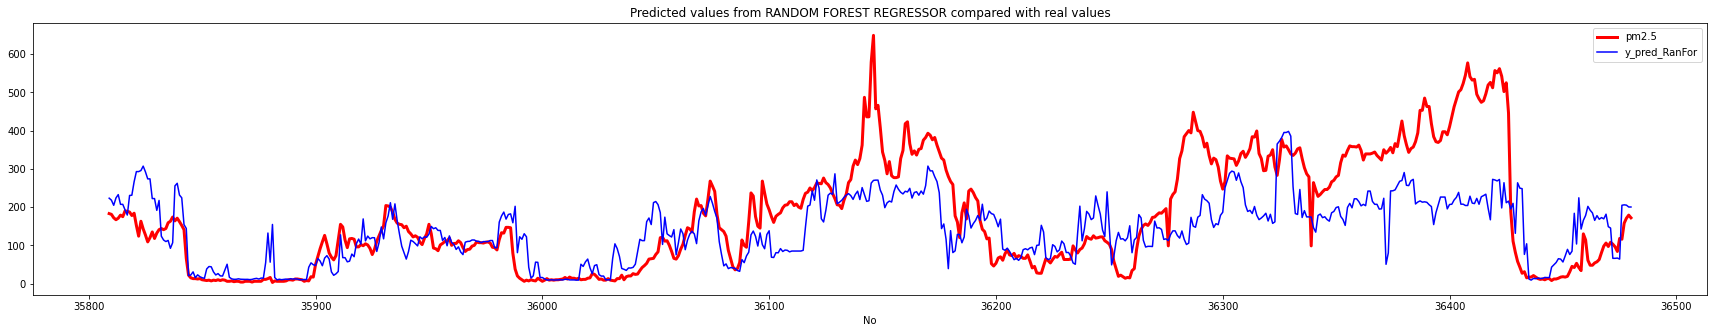

In [71]:
import matplotlib.pyplot as plt
#gca stands for 'get current axis'
ax = plt.gca()
plt.rcParams["figure.figsize"] = (30, 5)
plt.title('Predicted values from RANDOM FOREST REGRESSOR compared with real values')
df_14_02.plot(kind='line', x='No', y='pm2.5', color='red', linewidth=3, ax=ax)
df_14_02.plot(kind='line', x='No', y='y_pred_RanFor', color='blue', ax=ax)

plt.show()

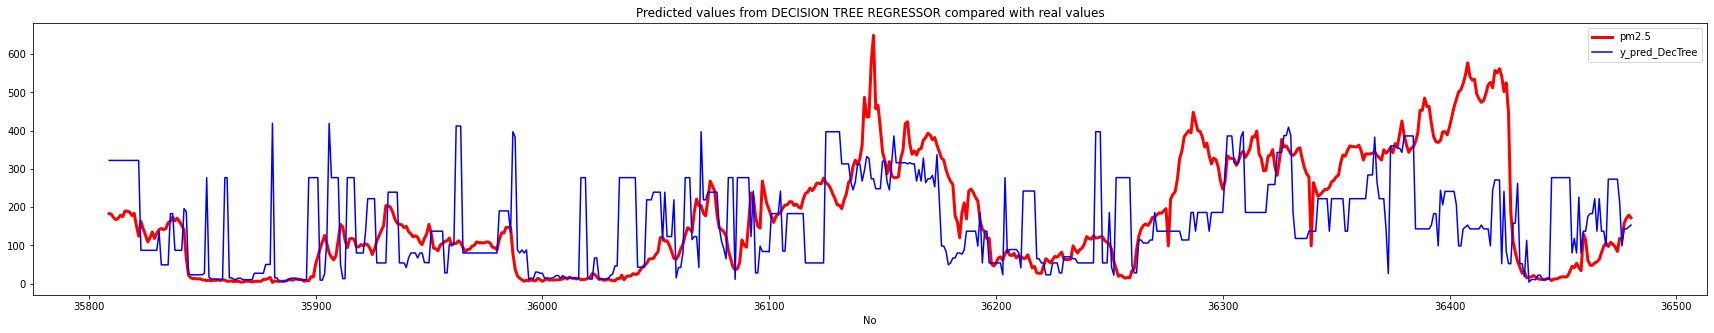

In [72]:
import matplotlib.pyplot as plt
#gca stands for 'get current axis'
ax = plt.gca()
plt.rcParams["figure.figsize"] = (30, 5)
plt.title('Predicted values from DECISION TREE REGRESSOR compared with real values')
df_14_02.plot(kind='line', x='No', y='pm2.5', color='red', linewidth=3, ax=ax)
df_14_02.plot(kind='line', x='No', y='y_pred_DecTree', color='blue', ax=ax)

plt.show()

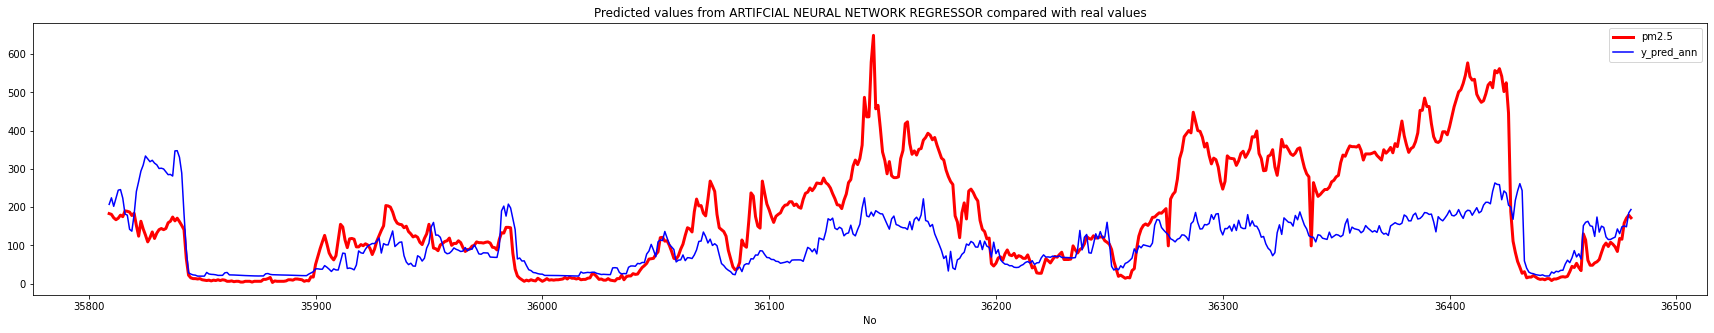

In [73]:
import matplotlib.pyplot as plt
#gca stands for 'get current axis'
ax = plt.gca()
plt.rcParams["figure.figsize"] = (30, 5)
plt.title('Predicted values from ARTIFCIAL NEURAL NETWORK REGRESSOR compared with real values')
df_14_02.plot(kind='line', x='No', y='pm2.5', color='red', linewidth=3, ax=ax)
df_14_02.plot(kind='line', x='No', y='y_pred_ann', color='blue', ax=ax)

plt.show()

In [70]:
#https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot